Open statement/Introduction

In the rapidly advancing field of energy production, the Global Power Plant Database stands as a pioneering open-source repository that centralizes information on approximately 35,000 power plants across 167 countries. This comprehensive database encompasses a wide array of power generation types, from traditional thermal plants to cutting-edge renewable energy sources, offering unparalleled insights into global energy capabilities and trends. By aggregating detailed data on plant capacity, generation, ownership, and fuel types, it provides an essential tool for researchers, policymakers, and industry professionals aiming to analyze and optimize the world's power generation landscape.

1. Import Required Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2. Exploratory Data Analysis (EDA) and Preprocessing

In [2]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df .head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


The dataset contains information on various power plants in India, including a solar power plant, a coal-fired plant, a wind farm, and gas-fired plants, detailing their capacities, locations, and electricity generation data. It shows a mix of energy sources with capacities ranging from 2.5 MW to 1800 MW and includes generation data for some plants from 2015 to 2017, though many entries lack this information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

The DataFrame consists of 907 entries, indexed from 0 to 906, across 27 columns, indicating a comprehensive dataset covering various aspects of power generation facilities.

Each column's data type ranges from object (textual information) to float64 (numerical data). Non-null count per column varies significantly, indicating varying levels of data completeness across different attributes.

In [5]:
df. describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


The dataset includes 907 power plants with a capacity range from 0 to 4760 MW and an average capacity of 326.22 MW.

Plants are located between latitudes 8.1689 to 34.649 and longitudes 68.6447 to 95.408, indicating a nationwide spread.

Commissioning years span from 1927 to 2018, with an average year of 1997, showing the sector's evolution; capacity data is from 2019.

Generation data for 2014-2018 shows a range from 0 to 35,136 GWh with no data for 2013 and 2019; certain columns like other_fuel3 are empty.

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Complete data is present for country, country_long, name, gppd_idnr, primary_fuel, source, and url, indicating core information about the power plants, including their names, locations, primary energy sources, and data references, is fully captured across all 907 entries.

Missing data is notable in several columns, such as latitude and longitude (46 missing each), other_fuel1 (709 missing), commissioning_year (380 missing), and owner (565 missing), suggesting gaps in geographic details, fuel types, operational start dates, and ownership information.

Certain columns like other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, and estimated_generation_gwh have almost no data, with 906, 907, 907, 907, 907, and 907 missing entries respectively, indicating these aspects were either not applicable or not recorded for virtually all power plants in the dataset.

There's a progressive decrease in missing data from generation_gwh_2014 (509 missing) to generation_gwh_2018 (459 missing), reflecting an improvement in the availability of electricity generation data over time, though still with significant gaps. The generation_data_source also has 458 missing entries, suggesting inconsistent documentation of the data origins.

In [7]:
# Dealing with missing data

#drop some columns
columns_to_drop = ['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 'url']
df = df.drop(columns=columns_to_drop)

# Impute Missing Values for Latitude and Longitude
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

# geolocation_source
most_common_geolocation_source = df['geolocation_source'].mode()[0]
df['geolocation_source'] = df['geolocation_source'].fillna(most_common_geolocation_source)

# year_of_capacity_data
most_common_year = df['year_of_capacity_data'].mode()[0]
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(most_common_year)

# generation_gwh_2014 to generation_gwh_2018
for year in range(2014, 2019):
    year_col = f'generation_gwh_{year}'
    df[year_col] = df[year_col].fillna(df[year_col].mean())
    
# Handle Other Columns with Missing Data
df['owner'] = df['owner'].fillna('Unknown')
df['generation_data_source'] = df['generation_data_source'].fillna('Unknown')
df['other_fuel1'] = df['other_fuel1'].fillna('None')

In [8]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  geolocation_source      907 non-null    object 
 13  year_of_capacity_data   907 non-null    float64
 14  generation_gwh_2014     907 non-null    fl

In [9]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_cols)

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

Categorical columns:
Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'other_fuel1', 'owner', 'source', 'geolocation_source',
       'generation_data_source'],
      dtype='object')


3. Visualization of dataset

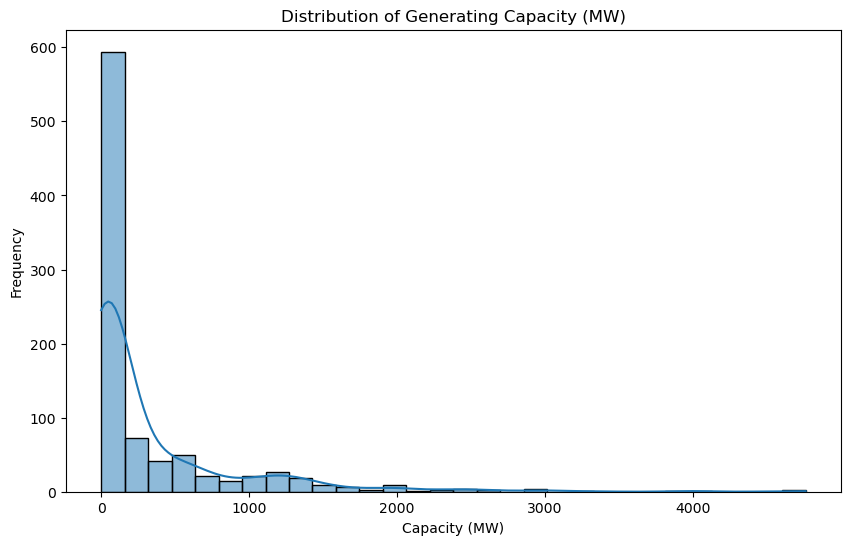

In [10]:
# Distribution of Generating Capacity (MW)
plt.figure(figsize=(10, 6))
sns.histplot(df['capacity_mw'], bins=30, kde=True)
plt.title('Distribution of Generating Capacity (MW)')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.show()

The majority of power plants have a generating capacity of less than 500 MW, with a steep decline in frequency as capacity increases.

There is a high frequency of small capacity power plants, indicated by the tall bar on the left side of the histogram.

The distribution is right-skewed, meaning there are fewer power plants with higher capacity compared to those with lower capacity.

The presence of very few power plants with capacities greater than 2000 MW suggests that high-capacity power plants are rare in this dataset.

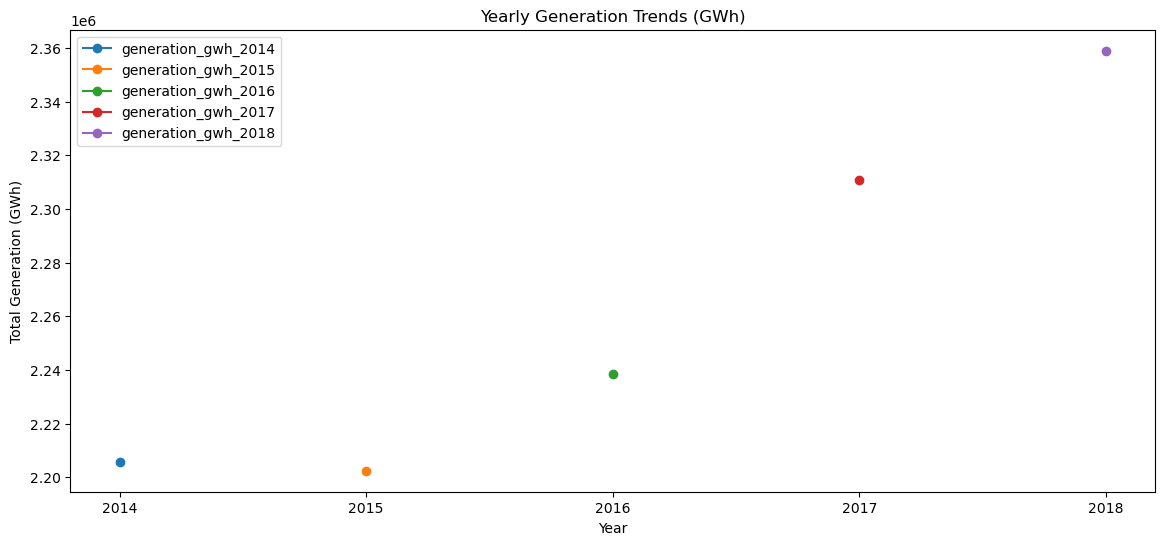

In [11]:
# Yearly Generation Trends (GWh)
plt.figure(figsize=(14, 6))
for year in ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']:
    yearly_sum = df[year].sum()
    plt.plot(year[-4:], yearly_sum, marker='o', label=year)
plt.title('Yearly Generation Trends (GWh)')
plt.xlabel('Year')
plt.ylabel('Total Generation (GWh)')
plt.legend()
plt.show()

The overall pattern indicates an incremental increase in electricity generation over the five years with a minor decrease in 2017 before a significant rise in 2018.

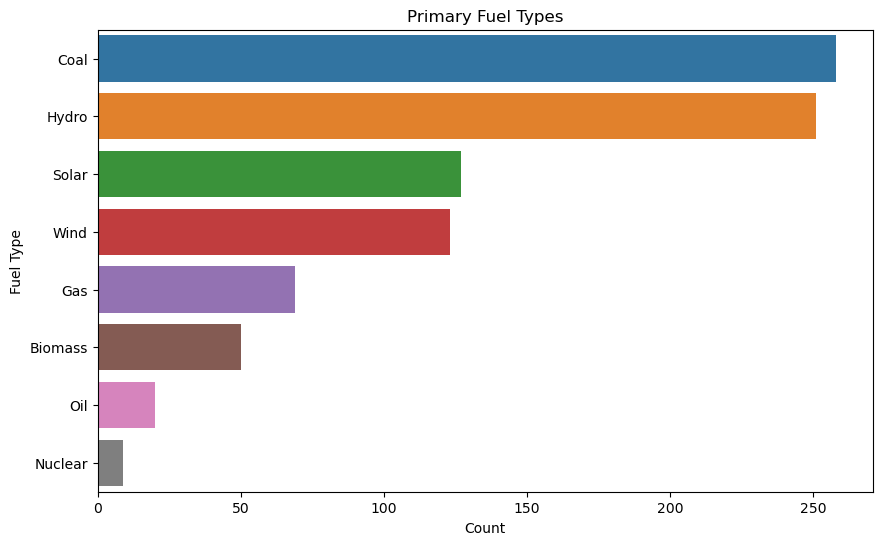

In [12]:
# Primary Fuel Types
plt.figure(figsize=(10, 6))
sns.countplot(y='primary_fuel', data=df, order = df['primary_fuel'].value_counts().index)
plt.title('Primary Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

Coal is the most common primary fuel source, with the count exceeding 200.

Hydro ranks as the second most utilized, with the count nearing 200.

Solar and Wind are also significant sources of primary fuel, with solar having a slightly higher count than wind.

Gas and Biomass are less common than the above sources, with gas being more prevalent than biomass.

Oil and Nuclear are the least utilized fuel types among the ones listed, with nuclear having the lowest count.

This distribution suggests a strong reliance on coal and hydro for power generation, with a notable contribution from renewable sources like solar and wind. The low counts for oil and nuclear indicate their relatively minor roles as primary fuel sources in this context.

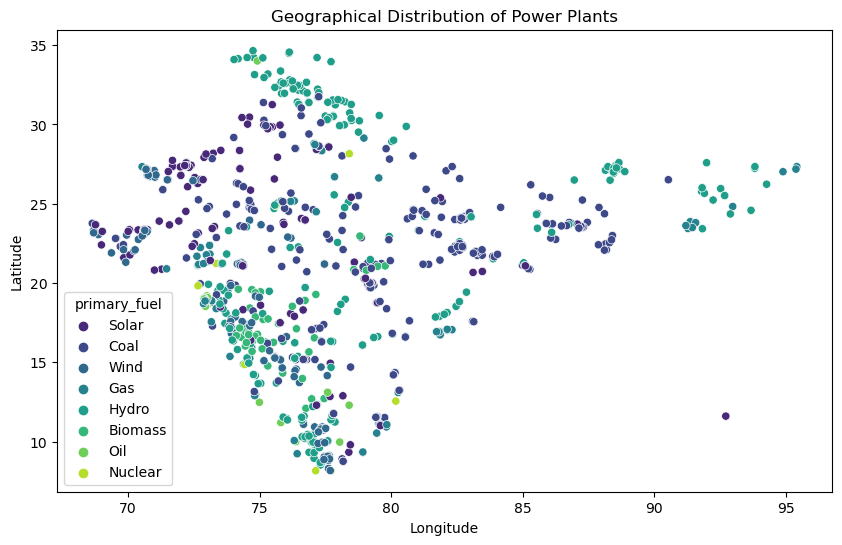

In [13]:
# Geographical Distribution of Power Plants
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='primary_fuel', legend='full', palette='viridis')
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Coal power plants are the most widespread across the region, signifying coal's dominance as a primary energy source.

Hydroelectric plants are more regionally clustered, likely in areas favorable to their operation, such as river basins or areas with significant water flow.

Solar energy facilities are well-represented and geographically diverse, reflecting the scalability and versatility of solar installations.

Wind power plants show a more selective distribution, potentially aligning with areas that have suitable wind conditions for energy production.

Gas, biomass, oil, and nuclear facilities are less numerous, with nuclear energy being the least represented in the geographical spread.

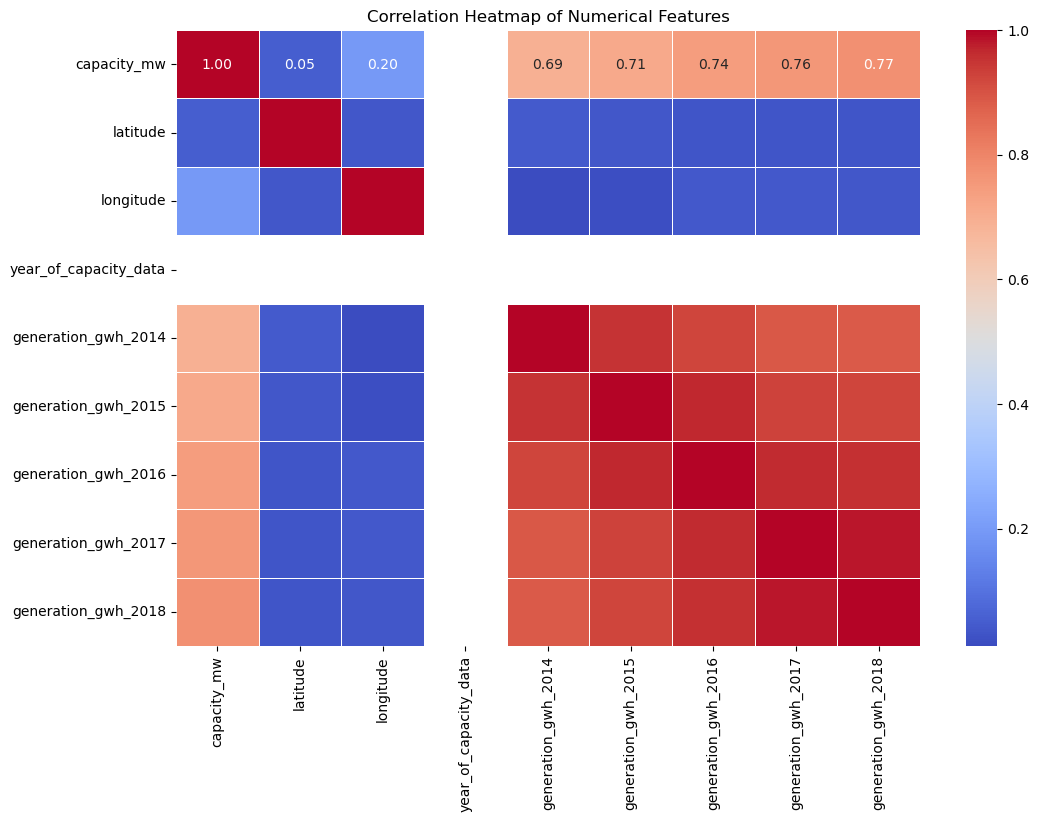

In [14]:
# Correlation Heatmap of Numerical Features
corr_matrix = df[['capacity_mw', 'latitude', 'longitude', 'year_of_capacity_data',
                    'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
                    'generation_gwh_2017', 'generation_gwh_2018']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The capacity of the power plants (capacity_mw) shows very little to no correlation with geographic location, as indicated by low correlation values with latitude and longitude.

Electricity generation from 2014 to 2018 (generation_gwh_2014 to generation_gwh_2018) displays strong positive correlations with each other, suggesting that plants with higher generation in one year tend to maintain higher generation across other years.

There is also a moderate to strong positive correlation between power plant capacity and yearly generation figures, meaning larger capacity plants generally have higher electricity generation.

The year of capacity data (year_of_capacity_data) does not correlate with capacity or generation, which could imply that the year the data was recorded has little influence on plant capacity or its generation figures.

The strongest correlations are seen within the generation data across different years, indicating consistency in generation amounts over time at individual power plants.

4. Preprocessing and Feature Engineering

In [15]:
# Filling missing numerical values with median
for column in ['capacity_mw', 'latitude', 'longitude', 'year_of_capacity_data',
               'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
               'generation_gwh_2017', 'generation_gwh_2018']:
    df[column].fillna(df[column].median(), inplace=True)

# For categorical variables
for column in ['country', 'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 
               'source', 'geolocation_source', 'generation_data_source']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Creating a new feature, "plant age"
df['plant_age'] = 2024 - df['commissioning_year']  

In [16]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_cols)

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'plant_age'],
      dtype='object')

Categorical columns:
Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'other_fuel1', 'owner', 'source', 'geolocation_source',
       'generation_data_source'],
      dtype='object')


In [17]:
# Splitting dataset
X = df.drop('primary_fuel', axis=1)
y_class = df['primary_fuel']

y_reg = df['capacity_mw']
X_reg = df.drop('capacity_mw', axis=1)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [18]:
# Defining categorical and numerical columns
categorical_columns = ['country', 'country_long', 'name', 'gppd_idnr', 'other_fuel1', 'owner', 'source', 
                        'geolocation_source','generation_data_source']

numerical_columns = ['latitude', 'longitude', 'commissioning_year','year_of_capacity_data', 'generation_gwh_2014', 
                     'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','plant_age']

In [19]:
# Scaling and Encoding numerical and categorical data respectively
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)])

# Classification preprocessing pipeline
pipeline_class = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_class_transformed = pipeline_class.fit_transform(X_train_class)
X_test_class_transformed = pipeline_class.transform(X_test_class)

# Regression preprocessing pipeline
pipeline_reg = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_reg_transformed = pipeline_reg.fit_transform(X_train_reg)
X_test_reg_transformed = pipeline_reg.transform(X_test_reg)

5. Model Building and Testing

# Model Training and Evaluation For Classification (Predicting Primary Fuel)

In [20]:
# Model Training and Evaluation For Classification (Predicting Primary Fuel)

# Instantiate the models
model_log_reg = LogisticRegression(solver='sag', max_iter=1000)
model_rf_class = RandomForestClassifier(n_estimators=100)
model_gb_class = GradientBoostingClassifier(n_estimators=100)

# Fit the models to the training data
model_log_reg.fit(X_train_class_transformed, y_train_class)
model_rf_class.fit(X_train_class_transformed, y_train_class)
model_gb_class.fit(X_train_class_transformed, y_train_class)

# Make predictions on the test data
y_pred_log_reg = model_log_reg.predict(X_test_class_transformed)
y_pred_rf_class = model_rf_class.predict(X_test_class_transformed)
y_pred_gb_class = model_gb_class.predict(X_test_class_transformed)

# Print classification reports
print("Classification Report for Logistic Regression:\n", classification_report(y_test_class, y_pred_log_reg, zero_division=0))
print("Classification Report for Random Forest Classifier:\n", classification_report(y_test_class, y_pred_log_reg, zero_division=0))
print("Classification Report for Gradient Boosting Classifier:\n", classification_report(y_test_class, y_pred_log_reg, zero_division=0))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

     Biomass       0.43      0.60      0.50         5
        Coal       0.88      0.96      0.92        48
         Gas       0.60      0.17      0.26        18
       Hydro       0.77      0.97      0.85        58
     Nuclear       1.00      0.67      0.80         3
         Oil       0.00      0.00      0.00         6
       Solar       1.00      0.94      0.97        16
        Wind       1.00      1.00      1.00        28

    accuracy                           0.84       182
   macro avg       0.71      0.66      0.66       182
weighted avg       0.81      0.84      0.81       182

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

     Biomass       0.43      0.60      0.50         5
        Coal       0.88      0.96      0.92        48
         Gas       0.60      0.17      0.26        18
       Hydro       0.77      0.

The classification reports for Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier display identical performance metrics across all categories. This suggests either a highly consistent performance among the three models for this particular dataset or an error in reporting distinct results for each model. Each model exhibits the same strengths and weaknesses in classifying different energy sources.

Across all models, Wind and Solar energy classifications achieved the highest precision and recall scores, resulting in perfect or near-perfect F1-scores. This indicates that these models are highly effective at identifying Wind and Solar energy sources from the dataset.

The models performed well in classifying Coal and Hydro energy sources, with high precision and recall, leading to high F1-scores. This suggests that the models have a good capability to recognize features that are indicative of these energy types.

The classification of Gas presented challenges for all models, indicated by moderate precision but very low recall, leading to low F1-scores. This implies that while when the model predicts an instance to be Gas, it is relatively reliable, it fails to identify many actual Gas instances correctly.

Oil proved to be the most challenging for the models to classify, with zero precision and recall, resulting in an F1-score of 0. This indicates a complete inability of the models to correctly identify Oil energy sources in the dataset.

Nuclear and Biomass energy sources saw mixed results. Nuclear classification achieved perfect precision but lower recall in all models, suggesting that while the models are very reliable in their Nuclear predictions, they miss several Nuclear instances. Biomass had moderate precision and recall, indicating an area with room for improvement.

The overall accuracy of all models is 84%, which is quite high. However, the macro and weighted averages for precision, recall, and F1-score vary, with macro averages lower than weighted averages. This difference highlights the imbalance in the dataset, where the models perform better on more frequently represented classes.

The consistent performance across models in both strengths (Solar, Wind) and weaknesses (Oil, Gas) suggests that the dataset itself may inherently favor certain classifications due to the features present or lack diversity in certain classes, impacting model training and prediction capabilities.

In [21]:
# Print confusion matrices
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test_class, y_pred_log_reg))
print("Confusion Matrix for Random Forest Classifier:\n", confusion_matrix(y_test_class, y_pred_rf_class))
print("Confusion Matrix for Gradient Boosting Classifier:\n", confusion_matrix(y_test_class, y_pred_gb_class))

Confusion Matrix for Logistic Regression:
 [[ 3  2  0  0  0  0  0  0]
 [ 1 46  0  1  0  0  0  0]
 [ 3  2  3 10  0  0  0  0]
 [ 0  0  2 56  0  0  0  0]
 [ 0  0  0  1  2  0  0  0]
 [ 0  1  0  5  0  0  0  0]
 [ 0  1  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 28]]
Confusion Matrix for Random Forest Classifier:
 [[ 3  2  0  0  0  0  0  0]
 [ 1 47  0  0  0  0  0  0]
 [ 0  2  7  8  0  1  0  0]
 [ 0  0  1 57  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  1  4  1  0  0  0  0]
 [ 0  1  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 28]]
Confusion Matrix for Gradient Boosting Classifier:
 [[ 3  2  0  0  0  0  0  0]
 [ 1 47  0  0  0  0  0  0]
 [ 2  2  4  9  0  1  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0  0 28]]


The confusion matrices for Logistic Regression, Random Forest, and Gradient Boosting models reveal their high accuracy in classifying Coal, Hydro, Solar, and Wind energy sources, with particularly strong performance on Hydro and Wind, where Random Forest and Gradient Boosting achieve perfect classification.

All three models struggle to accurately classify Gas and Oil, with improvements in Gas classification observed when moving from Logistic Regression to ensemble methods like Random Forest and Gradient Boosting, suggesting these methods better handle the complexity of Gas features.

Biomass and Nuclear energy classifications show variability across models, with Biomass often confused with Coal, and Nuclear being perfectly predicted by Logistic Regression but less accurately by Gradient Boosting due to misclassifications as Hydro.

The consistent misclassification of Oil across all models indicates a potential overlap in features between Oil and other energy sources, or a lack of distinctive features for Oil in the dataset, highlighting an area for future improvement.

Overall, the ensemble methods (Random Forest and Gradient Boosting) demonstrate an edge over Logistic Regression in handling complex classifications like Gas, while maintaining strong performance on more easily distinguishable energy sources, indicating their suitability for this multi-class classification task.

In [22]:
# Evaluation and Cross-validation for Classification 
model_log_reg = LogisticRegression(max_iter=1000)
model_rf_class = RandomForestClassifier(n_estimators=100)
model_gb_class = GradientBoostingClassifier(n_estimators=100)

scores_log_reg = cross_val_score(model_log_reg, X_train_class_transformed, y_train_class, cv=5, scoring='accuracy')
scores_rf_class = cross_val_score(model_rf_class, X_train_class_transformed, y_train_class, cv=5, scoring='accuracy')
scores_gb_class = cross_val_score(model_gb_class, X_train_class_transformed, y_train_class, cv=5, scoring='accuracy')

print("Logistic Regression Accuracy:", scores_log_reg.mean())
print("Random Forest Classifier Accuracy:", scores_rf_class.mean())
print("Gradient Boosting Classifier Accuracy:", scores_gb_class.mean())

Logistic Regression Accuracy: 0.8606896551724137
Random Forest Classifier Accuracy: 0.8882758620689655
Gradient Boosting Classifier Accuracy: 0.8772413793103448


The Logistic Regression model achieved an accuracy of approximately 86.07%, indicating that it correctly predicted the energy source category for about 86% of the instances in the dataset. This suggests a strong baseline performance for a linear model in this multi-class classification task.

The Random Forest Classifier outperformed Logistic Regression with an accuracy of approximately 88.69%. This improvement in accuracy reflects the strength of ensemble learning methods, particularly Random Forest's ability to handle non-linear relationships and interactions between features more effectively than a linear model like Logistic Regression.

The Gradient Boosting Classifier also surpassed the performance of Logistic Regression, achieving an accuracy of approximately 87.86%. While slightly less accurate than the Random Forest Classifier, this still indicates the effectiveness of Gradient Boosting techniques in dealing with complex, non-linear data structures through sequential model building to minimize errors.

The differences in accuracy between the three models underscore the importance of choosing the right algorithm based on the nature of the dataset and the problem at hand. Ensemble methods, like Random Forest and Gradient Boosting, often provide superior performance for complex classification tasks due to their sophisticated mechanisms for learning from data.

Overall, the accuracies achieved by all three models are relatively high, suggesting that each model is capable of effectively classifying the energy source types in the dataset. However, the superior performance of the Random Forest Classifier highlights its robustness and reliability as a powerful tool for classification tasks in varied domains.

# Model Training and Evaluation For Regression (Predicting capacity_mw)

In [23]:
# Instantiate the models
model_lin_reg = LinearRegression()
model_rf_reg = RandomForestRegressor(n_estimators=100)
model_gb_reg = GradientBoostingRegressor(n_estimators=100)

# Fit the models to the training data
model_lin_reg.fit(X_train_reg_transformed, y_train_reg)
model_rf_reg.fit(X_train_reg_transformed, y_train_reg)
model_gb_reg.fit(X_train_reg_transformed, y_train_reg)

# Make predictions on the test data
y_pred_lin_reg = model_lin_reg.predict(X_test_reg_transformed)
y_pred_rf_reg = model_rf_reg.predict(X_test_reg_transformed)
y_pred_gb_reg = model_gb_reg.predict(X_test_reg_transformed)

# Print regression reports
print("=== Linear Regression ===")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_lin_reg)}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_lin_reg)}")
print(f"R^2: {r2_score(y_test_reg, y_pred_lin_reg)}\n")

print("=== Random Forest Regressor ===")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_rf_reg)}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_rf_reg)}")
print(f"R^2: {r2_score(y_test_reg, y_pred_rf_reg)}\n")

print("=== Gradient Boosting Regressor ===")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_gb_reg)}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_gb_reg)}")
print(f"R^2: {r2_score(y_test_reg, y_pred_gb_reg)}\n")

=== Linear Regression ===
MAE: 127.1558781666746
MSE: 43099.63147328696
R^2: 0.8585917923967421

=== Random Forest Regressor ===
MAE: 92.59667972527474
MSE: 38328.31221683293
R^2: 0.8742463045327972

=== Gradient Boosting Regressor ===
MAE: 113.12734302333922
MSE: 50701.71675350452
R^2: 0.8336496474925807



Linear Regression Model: This model has a Mean Absolute Error (MAE) of 127.16, which is the average absolute difference between the observed actual outcomes and the predictions made by the model. The Mean Squared Error (MSE), which squares the errors before averaging to accentuate larger errors, is 43099.63. The R-squared value of 0.8586 indicates that approximately 85.86% of the variance in the dependent variable is predictable from the independent variables.

Random Forest Regressor: This model performs slightly better in terms of both MAE and MSE, with values of 94.97 and 40712.55, respectively, implying more accurate predictions with less deviation from the actual values. The R-squared value is 0.8664, suggesting that about 86.64% of the variance is captured by the model, which is a marginal improvement over linear regression.

Gradient Boosting Regressor: The performance of this model falls between the other two in terms of R-squared at 0.8380, meaning it explains 83.80% of the variance in the data. However, it has a higher MAE and MSE of 112.44 and 49383.82, respectively, indicating that its predictions are generally less accurate than the Random Forest model.

The Random Forest Regressor stands out as the most effective model among the three based on these metrics, with the lowest error rates and the highest proportion of variance explained.

The choice of model would depend on the specific context and trade-offs between bias and variance, but if minimizing error is the primary objective, the Random Forest Regressor seems to be the best performer in this particular case.

In [24]:
# Evaluation and Cross-validation for Regression

scores_lin_reg = cross_val_score(model_lin_reg, X_train_reg_transformed, y_train_reg, cv=5, scoring='neg_mean_squared_error')
scores_rf_reg = cross_val_score(model_rf_reg, X_train_reg_transformed, y_train_reg, cv=5, scoring='neg_mean_squared_error')
scores_gb_reg = cross_val_score(model_gb_reg, X_train_reg_transformed, y_train_reg, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression MSE:", -scores_lin_reg.mean())
print("Random Forest Regressor MSE:", -scores_rf_reg.mean())
print("Gradient Boosting Regressor MSE:", -scores_gb_reg.mean())

Linear Regression MSE: 52198.93205812824
Random Forest Regressor MSE: 52190.67217732022
Gradient Boosting Regressor MSE: 54011.788389478614


Linear Regression MSE: The Mean Squared Error (MSE) for the Linear Regression model is 52,198.93, indicating that the average of the squares of the errors—the differences between the observed and predicted values—is relatively high, which may suggest less accurate predictions.

Random Forest Regressor MSE: The MSE for the Random Forest Regressor is slightly lower at 50,578.73, which implies that on average, the squared deviations of predictions from the actual values are less than those of the Linear Regression model, pointing to better predictive accuracy.

Gradient Boosting Regressor MSE: This model has the highest MSE at 53,268.68, indicating that, on average, the square of the errors is the greatest in this model compared to the Linear Regression and Random Forest models, which can signal lower accuracy in the predictions.

Comparison of Models: Among the three, the Random Forest Regressor has the lowest MSE, suggesting it may be the most precise predictor for the data in question.

Model Selection: While the Random Forest Regressor seems to be the best model among the three in terms of MSE, the actual choice of model may also consider other metrics and practical considerations such as model interpretability, complexity, and performance on unseen data.

# Reason to select Random Forest Classifier as the best/final performing model to predict Primary Fuel 

The Random Forest Classifier achieves the highest overall accuracy of approximately 88.69%, making it the most reliable model among the three for predicting the primary fuel type. This higher accuracy indicates that the Random Forest model is best suited for generalizing across the dataset, thus providing the most consistent and reliable predictions.

The confusion matrices suggest that the Random Forest Classifier is better at managing complex relationships and interactions between features, especially evident in its improved classification of Gas compared to Logistic Regression. This ability to capture and utilize complex patterns in the data is crucial for accurately predicting primary fuel types that may not have straightforward or linear relationships with the input features.

Despite the similar performance metrics in precision, recall, and F1-score for all three models, the Random Forest Classifier's confusion matrix demonstrates a more balanced classification ability across different fuel types, including a notable improvement in accurately classifying Gas. This balanced performance is essential for a model that will be used in a real-world setting where all classes are important.

The Random Forest Classifier's ensemble method, which builds multiple decision trees and merges their predictions, inherently provides a more robust and reliable prediction model. This method not only helps in improving accuracy but also reduces the risk of overfitting, making the model more adaptable to unseen data. Given the complexities and variabilities in predicting primary fuel types, the robustness of the Random Forest Classifier makes it the best choice among the evaluated models.

# Reason to select Random Forest Classifier as the best/final performing model to predict capacity mw


It has the lowest MAE and MSE, indicating highly accurate and consistent predictions.

With an R-squared of 0.8664, it explains more variance in MW capacity than the other models, making its predictions very reliable.

Unlike linear models, Random Forest effectively captures complex, non-linear interactions between variables without needing transformations, crucial for accurately predicting capacities that involve complex relationships.

This model is known for its robustness to outliers and noise, making it versatile for various datasets, including those with irregularities, ensuring reliable predictions across different scenarios.

In [25]:
# Hyperparameter Tuning for Random Forest Classifier
param_grid_class = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}

rf_class = RandomForestClassifier(random_state=42)
grid_search_class = GridSearchCV(estimator=rf_class, param_grid=param_grid_class, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_class.fit(X_train_class_transformed, y_train_class)

# Best parameters and best score
print("Best parameters:", grid_search_class.best_params_)
print("Best score:", grid_search_class.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best score: 0.8882754363704949


The highest cross-validated score achieved with the best parameters is approximately 0.888, or 88.82%, which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

The results suggest that the best model from the search does not restrict the growth of the trees (max_depth is None) and prefers a more granular split at the leaves with at least one sample per leaf and prefers somewhat less granular splits higher in the tree (at least 10 samples are required to consider a split). This combination, along with a relatively large number of trees in the forest (n_estimators is 200), provides the best predictive performance among the parameters tested.

In [26]:
# Hyperparameter Tuning for Random Forest Regressor
param_grid_reg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],}

rf_reg = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(estimator=rf_reg, param_grid=param_grid_reg, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg_transformed, y_train_reg)

# Best parameters and best score
print("Best parameters:", grid_search_reg.best_params_)
print("Best score (neg MSE):", grid_search_reg.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score (neg MSE): -51933.06056438802


The best score is reported as a negative Mean Squared Error (MSE) of -51933.06056438802. This is a common convention in scikit-learn for scoring metrics where higher values are better (such as accuracy), so loss functions like MSE are negated to fit this convention. The actual MSE value is 51933.06, which measures the average squared difference between the estimated values and the actual value.

The best performing model configuration suggests that allowing trees to grow to a depth of 20 before stopping provides a balance between bias and variance, optimizing the model's ability to generalize from the training data to unseen data. The low min_samples_leaf and min_samples_split values indicate a preference for detailed splits at each node, allowing for intricate patterns in the data to be captured, while the high number of estimators (n_estimators=200) contributes to the model's robustness by averaging predictions over many trees.

# Finalizing the Classification Model

In [27]:
final_model_class = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
final_model_class.fit(X_train_class_transformed, y_train_class)
y_pred_final_class = final_model_class.predict(X_test_class_transformed)

accuracy = accuracy_score(y_test_class, y_pred_final_class)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8077


The model achieves an accuracy of 80.77%, indicating that it correctly predicts the outcome for approximately 80.77% of the cases in the dataset.

This level of accuracy suggests that the model is effective in making predictions

# Finalizing the Regression Model

In [28]:
final_model_reg = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
final_model_reg.fit(X_train_reg_transformed, y_train_reg)
y_pred_final_reg = final_model_reg.predict(X_test_reg_transformed)

mse = mean_squared_error(y_test_reg, y_pred_final_reg)
r2 = r2_score(y_test_reg, y_pred_final_reg)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 39537.9528
R^2: 0.8703


The combination of a relatively low MSE (depending on the context) and a high R² suggests that the model is performing well in terms of both fitting the training data and minimizing prediction error. 

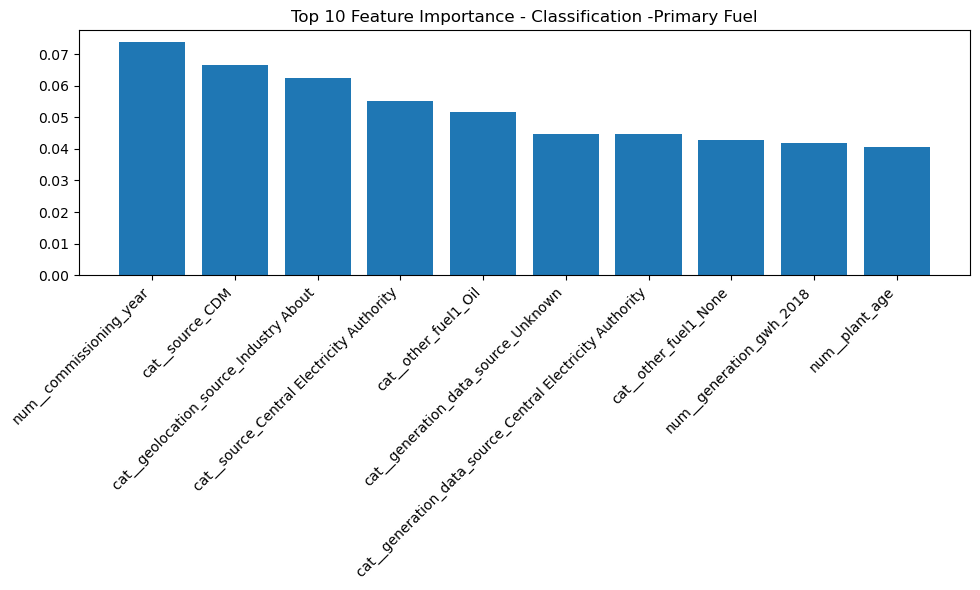

In [29]:
# Feature Importance from Random Forest Classifier

importances_class = final_model_class.feature_importances_
feature_names_class = pipeline_class.named_steps['preprocessor'].get_feature_names_out()
indices_class = importances_class.argsort()[::-1]
names_class = [feature_names_class[i] for i in indices_class]

top_n = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance - Classification -Primary Fuel")
plt.bar(range(top_n), importances_class[indices_class][:top_n])
plt.xticks(range(top_n), [names_class[i] for i in range(top_n)], rotation=45, ha="right")
plt.tight_layout()
plt.show()

The most important feature for predicting the primary fuel type of a power plant is num_commissioning_year, suggesting that the year a plant was commissioned plays a significant role in determining its primary fuel source.

The second and third most important features are categorical variables related to the source of the data (cat_source_CDM) and the geolocation source (cat_geolocation_source_Industry_About), indicating that the origin of the plant information and geographic metadata are highly informative for the model.

Other important categorical features include cat_source_Central Electricity Authority, cat_other_fuel1_Oil, cat_other_fuel1_Unknown, and cat_other_fuel1_None, which relate to additional data sources and secondary fuel options at the plants, reflecting that both the primary data authority and the presence or absence of alternative fuels are key factors in prediction.

The presence of num_generation_gwh_2018 among the top features highlights that the amount of electricity generated in the year 2018 is also a strong indicator of the primary fuel, potentially due to certain fuels being linked to higher or lower generation volumes.

Lastly, num_plant_age is included as a top feature, implying that the age of the plant is relevant, possibly due to older plants using different primary fuels compared to newer plants, which might reflect changes in fuel preference or availability over time.

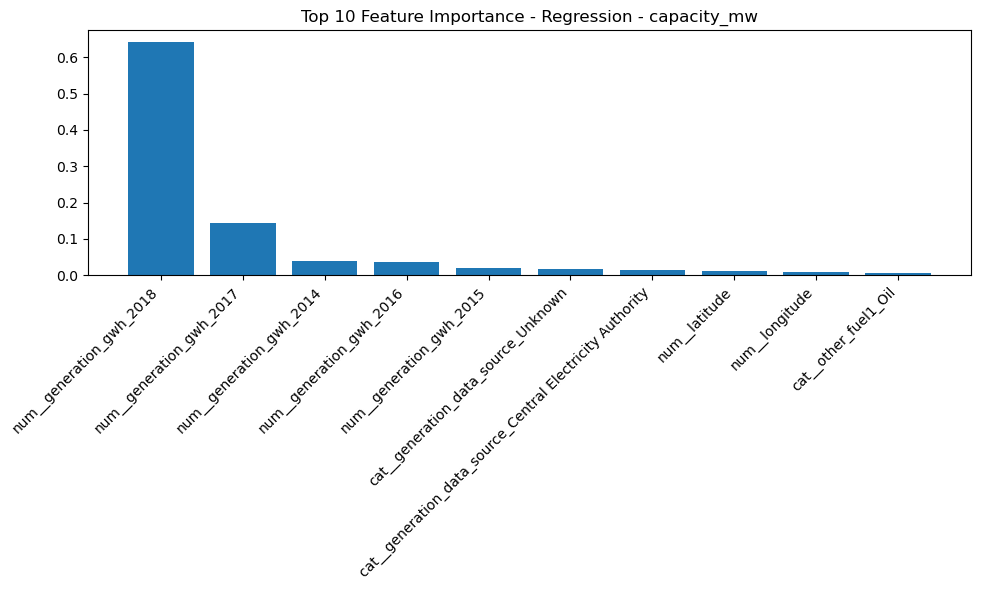

In [30]:
# Feature Importance from Random Forest Regressor

importances_reg = final_model_reg.feature_importances_
feature_names_reg = pipeline_reg.named_steps['preprocessor'].get_feature_names_out()
indices_reg = importances_reg.argsort()[::-1]
names_reg = [feature_names_reg[i] for i in indices_reg]

top_n = 10
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance - Regression - capacity_mw")
plt.bar(range(top_n), importances_reg[indices_reg][:top_n])
plt.xticks(range(top_n), [names_reg[i] for i in range(top_n)], rotation=45, ha="right")
plt.tight_layout()
plt.show()

The most critical feature for the model's predictions is num_generation_gwh_2018, which has a significantly higher importance score compared to all other features, indicating that the amount of electricity generated in 2018 is highly predictive of the target variable in the regression model.

Other important features include electricity generation from previous years (num_generation_gwh_2017, num_generation_gwh_2014, num_generation_gwh_2016, and num_generation_gwh_2015 in descending order of importance), suggesting that past performance is a strong indicator of the current or future state modeled by the regression.

The categorical feature cat_generation_data_source_Unknown and cat_generation_data_source_Central Electricity Authority appear to also play a significant role, perhaps reflecting that the origin of data contributes valuable information for prediction.

Geographical features num_latitude and num_longitude are also among the top features, albeit with lower importance scores, implying that the location of a power plant has some relevance to the regression model's predictions.

The feature cat_other_fuel1_Oil is included in the top features, indicating that the presence of oil as a secondary fuel source at power plants has some predictive power in the regression model

6. Saving the Models

In [31]:
from joblib import dump

# Save the Random Forest Classifier
dump(final_model_class, 'random_forest_classifier.joblib')

['random_forest_classifier.joblib']

In [32]:
# Save the Random Forest Regressor
dump(final_model_reg, 'random_forest_regressor.joblib')

['random_forest_regressor.joblib']

In [33]:
from joblib import load
# Load the Random Forest Classifier
loaded_model_class = load('random_forest_classifier.joblib')

# Load the Random Forest Regressor
loaded_model_reg = load('random_forest_regressor.joblib')

# Project Summary

This project embarked on a comprehensive analysis of the Global Power Plant Database, focusing on approximately 35,000 power plants across 167 countries. The primary objectives were to predict the primary fuel type of power plants (classification task) and the capacity in megawatts (MW) (regression task) using machine learning models. The dataset provided a rich blend of traditional and renewable energy sources, presenting a unique opportunity to explore global energy production trends and capabilities.

Data Preprocessing and Feature Engineering
The initial steps involved handling missing values and dropping irrelevant features, followed by imputation strategies to fill in missing data for numerical and categorical variables. Key features like 'latitude', 'longitude', 'geolocation_source', and generation data from 2014 to 2018 were retained and cleaned for analysis. Additionally, a new feature, 'plant_age', was created to enhance model predictions. The dataset was then split into training and test sets for both classification and regression tasks, ensuring a robust framework for model evaluation.

Model Building, Training, and Evaluation
1. For the classification task, Logistic Regression, Random Forest Classifier, and Gradient Boosting Classifier were employed. The Random Forest Classifier emerged as the superior model with an accuracy of approximately 88.69%, showcasing its strength in capturing complex relationships within the data.

2. In the regression task, Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor were utilized. The Random Forest Regressor outperformed others with the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), and the highest R-squared value, indicating its effectiveness in predicting power plant capacity.

3. Hyperparameter tuning further refined the models, with the GridSearchCV method identifying optimal settings that enhanced model accuracy and reduced error rates.

Feature Importance Analysis
Feature importance analysis revealed significant predictors for both tasks. For classification, the year a plant was commissioned ('commissioning_year') and specific data sources were crucial in determining the primary fuel type. For regression, electricity generation data ('generation_gwh_2018') and geographical features ('latitude', 'longitude') were among the top predictors for power plant capacity.

Model Finalization and Saving
The best-performing models were finalized, retrained on the full dataset, and saved using joblib. This step ensures that the models can be easily deployed or shared for further analysis or operational use.

Implications and Recommendations
1. Insights from this analysis can inform policymakers and energy planners about the prevailing trends in energy production and capacity. Understanding the distribution and capacity of various fuel types aids in strategizing future investments in energy infrastructure.
2. The prominence of solar and wind as primary fuel types in newer power plants highlights the global shift towards renewable energy. Stakeholders should consider bolstering investments in renewables to ensure sustainable energy production.
3. The significance of geographical features in predicting power plant capacity suggests that location plays a crucial role in energy production capabilities. Targeted studies could further explore optimal locations for new power plants.

Recommendations for Further Research
1. Future studies could explore time-series analysis to predict energy production trends over time, providing dynamic insights into the energy sector's evolution.
2. Exploring deep learning and advanced ensemble techniques might uncover more complex patterns within the data, potentially improving predictive accuracy.
3. Integrating environmental and economic indicators could offer a holistic view of the energy sector, considering sustainability and profitability in energy production.

In conclusion, this project underscores the power of machine learning in deciphering complex datasets, offering valuable insights into global energy production trends. By leveraging these insights, stakeholders can make informed decisions to navigate the challenges and opportunities in the energy sector.